Code for generating VGA data for an EEPROM. Used for testing a primitive VGA graphics generator.

In [104]:
import cv2
import numpy as np

In [105]:
def mapRange(value, inMin, inMax, outMin, outMax):
    return outMin + (((value - inMin) / (inMax - inMin)) * (outMax - outMin))

def bgr_to_hex(in_col):
    for i in range(0, len(in_col)):
        in_col[i] = mapRange(in_col[i], 0, 255, 0, 255)
    col = 0
    col += int(in_col[2] / 64) & 0b11
    col <<= 3
    col += int(in_col[1] / 32) & 0b111
    col <<= 2
    col += int(in_col[0] / 64) & 0b11
    col <<= 1
    return col

In [106]:
img = cv2.imread('bliss.png', cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, (205, 120))

In [107]:
sprite = np.empty((128, 256), dtype='int8')
for r in range(0, 128):
    for c in range(0, 256):
        try: 
            col = bgr_to_hex(img[r][c])
        except:
            pass
        if col & 0b00111000 == 0b00111000:
            col &= 0b11110111
        if c >= 205:
            col = bgr_to_hex([0, 0, 0])
        if c >= 210 and c < 241:
            col = 0b0
        else:
            col |= 1
        if r >= 120:
            col = (col & 1) | bgr_to_hex([0,0,0])
        if r == 122:
            col = (col & 1) | 0b11111110
        sprite[r][(c + 256 - 220) % 256] = col
        #print(format(col, '02x'), end=' ')
    #print('0A', end=' ')
#print('0C')

In [108]:
screen = np.empty((sprite.shape[0], sprite.shape[1], 3))
for r in range(0, sprite.shape[0]):
    for c in range(0, sprite.shape[1]):
        screen[r][c][0] = ((sprite[r][c] >> 6) & 0b11) / 3
        screen[r][c][1] = ((sprite[r][c] >> 3) & 0b111) / 7
        screen[r][c][2] = ((sprite[r][c] >> 1) & 0b11) / 3

(128, 256)


32768

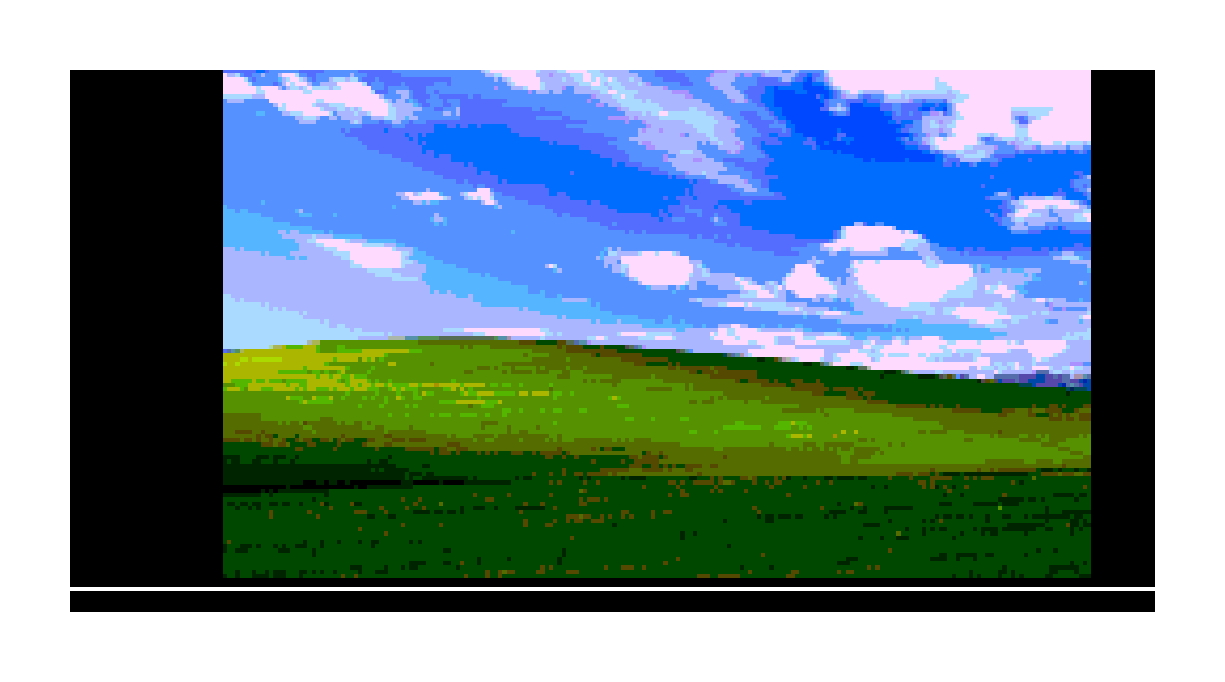

In [109]:
import matplotlib.pyplot as plt
print(sprite.shape)
plt.figure(figsize=(2,2), dpi=700)
plt.axis('off')
plt.imshow(screen)
open('eeprom.bin', 'wb').write(sprite.tobytes())